# Projet 6 - Classifiez automatiquement des biens de consommation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import fonctions as fc
import importlib
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn import cluster, metrics

import os
from os import listdir
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, adjusted_rand_score, confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, GlobalAveragePooling1D, Flatten, Dense, Dropout 
from tensorflow.keras.layers import Rescaling, RandomFlip, RandomRotation, RandomZoom
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

import cv2
from PIL import Image, ImageOps, ImageFilter
from IPython.display import Image, display

D:\Programme\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]

In [3]:
importlib.reload(fc)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Anais\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


<module 'fonctions' from 'C:\\Users\\Anais\\Documents\\OpenClassRooms\\Projet6+Classifiez+automatiquement+des+biens+de+consommation\\Dataset+projet+prétraitement+textes+images\\Flipkart\\fonctions.py'>

# Enoncé

Vous êtes Data Scientist au sein de l’entreprise "Place de marché”, qui souhaite lancer une marketplace e-commerce.

Sur cette place de marché anglophone, des vendeurs proposent des articles à des acheteurs en postant une photo et une description.
 
Pour l'instant, l'attribution de la catégorie d'un article est effectuée manuellement par les vendeurs, et est donc peu fiable. De plus, le volume des articles est pour l’instant très pe

Pour rendre l’expérience utilisateur des vendeurs (faciliter la mise en ligne de nouveaux articles) et des acheteurs (faciliter la recherche de produits) la plus fluide possible, et dans l'optique d'un passage à l'échelle,  il devient nécessaire d'automatiser cette tâche d‘attribution de la catrie.

Linda, Lead Data Scientist, vous demande donc d'étudier la faisabilité d'un moteur de classification des articles en différentes catégories, à partir du texte (en anglais) et de l’image comme dans l’illustration

# Missions

La faisabilité de regrouper automatiquement des produits de même catégorie a pu être démontré dans les deux notebooks précédents.

Dans ce notebook, nous nous concentrerons sur la réalisation d'une classification supervisée à partir d'images:

"Je souhaiterais que tu mettes en place une data augmentation afin d’optimiser le modèle.

Nous souhaitons élargir notre gamme de produits, en particulier dans l’épicerie fine. Pourrais-tu tester la collecte de produits à base de “champagne” via l’API disponible ici ? Je souhaiterais que tu puisses nous fournir une extraction des 10 premiers produits dans un fichier “.csv”, contenant pour chaque produit les données suivantes : foodId, label, category, foodContentsLabel, imag". 


## I- Visualisation des données

In [4]:
# Import du jeu de données
df = pd.read_csv("C:\\Users\\Anais\\Documents\\OpenClassRooms\\Projet6+Classifiez+automatiquement+des+biens+de+consommation\\Dataset+projet+prétraitement+textes+images\\Flipkart\\path_image_cleaned.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df.head()

,image,main_category,path_image,processed_images
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,home furnishing,Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,Images_processed\55b85ea15a1536d46b7190ad6fff8...
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,baby care,Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,Images_processed\7b72c92c2f6c40268628ec5f14c6d...
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,baby care,Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,Images_processed\64d5d4a258243731dc7bbb1eef49a...
3,d4684dcdc759dd9cdf41504698d737d8.jpg,home furnishing,Images/d4684dcdc759dd9cdf41504698d737d8.jpg,Images_processed\d4684dcdc759dd9cdf41504698d73...
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,home furnishing,Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,Images_processed\6325b6870c54cd47be6ebfbffa620...


In [5]:
print('Ce jeu de donnée comporte ' + str(df.shape[0]) + ' lignes et ' + str(df.shape[1]) + ' colonnes')

Ce jeu de donnée comporte 1050 lignes et 4 colonnes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image             1050 non-null   object
 1   main_category     1050 non-null   object
 2   path_image        1050 non-null   object
 3   processed_images  1050 non-null   object
dtypes: object(4)
memory usage: 32.9+ KB


## II- Nettoyage des données

On élimine les colonnes inutiles pour ce notebook

In [7]:
# Elimination des variables inutiles pour ce notebook
df = df.drop(["image", "processed_images"], axis= 1)
df.head()

,main_category,path_image
0,home furnishing,Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg
1,baby care,Images/7b72c92c2f6c40268628ec5f14c6d590.jpg
2,baby care,Images/64d5d4a258243731dc7bbb1eef49ad74.jpg
3,home furnishing,Images/d4684dcdc759dd9cdf41504698d737d8.jpg
4,home furnishing,Images/6325b6870c54cd47be6ebfbffa620ec7.jpg


La variable 'main_category' doit être encodé

In [8]:
# Encodage de la catégorie
encoder= LabelEncoder()
df["class"] = encoder.fit_transform(df["main_category"])
df.head()

,main_category,path_image,class
0,home furnishing,Images/55b85ea15a1536d46b7190ad6fff8ce7.jpg,4
1,baby care,Images/7b72c92c2f6c40268628ec5f14c6d590.jpg,0
2,baby care,Images/64d5d4a258243731dc7bbb1eef49ad74.jpg,0
3,home furnishing,Images/d4684dcdc759dd9cdf41504698d737d8.jpg,4
4,home furnishing,Images/6325b6870c54cd47be6ebfbffa620ec7.jpg,4


In [9]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/7, random_state=42)

data_ = np.concatenate((X_train, y_train.to_numpy().reshape(-1, 1)), axis=1)
data = pd.DataFrame(data_, columns=list(X.columns) + ['label'])
data_test_ = np.concatenate((X_test, y_test.to_numpy().reshape(-1, 1)), axis=1)
data_test = pd.DataFrame(data_test_, columns=list(X.columns) + ['label'])

In [10]:
print(data.shape)
data.head(2)

(900, 3)


,main_category,path_image,label
0,watches,Images/c7207128c680a437e1cad834a8880007.jpg,6
1,beauty and personal care,Images/417ae3e8b08acc19a023b8a958644799.jpg,1


In [11]:
print(data_test.shape)
data_test.head(2)

(150, 3)


,main_category,path_image,label
0,computers,Images/833a87b0af3b84fe246d2ebf271af177.jpg,2
1,kitchen and dining,Images/55195de3873fffaa9e37b041533d7305.jpg,5


## III- Classification supervisée

### 3.1) Création du modèle de classification

La fonction **create_model_fct()** retourne un modèle CNN pré-entraîné basé sur l'architecture VGG16 avec un nouveau classifieur ajouté. Le modèle est chargé avec les poids entraînés sur l'ensemble de données ImageNet. Seuls les derniers couches du modèle sont entraînables et les poids des couches de convolution sont figés. Le modèle est compilé avec une fonction de perte categorical_crossentropy et l'optimiseur rmsprop. Enfin, la fonction retourne le modèle.

In [12]:
def create_model_fct() :
    # Récupération modèle pré-entraîné
    model0 = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))

    # Layer non entraînables = on garde les poids du modèle pré-entraîné
    for layer in model0.layers:
        layer.trainable = False

    # Récupérer la sortie de ce réseau
    x = model0.output
    # Compléter le modèle
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(7, activation='softmax')(x)

    # Définir le nouveau modèle
    model = Model(inputs=model0.input, outputs=predictions)
    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='rmsprop', metrics=["accuracy"])

    print(model.summary())
    
    return model

### 3.2) Approche préparation initiale des images

In [13]:
def image_prep_fct(data) :
    prepared_images = []
    for image_num in range(len(data['path_image'])) :
        img = (load_img(
            data['path_image'][image_num],
            target_size=(224, 224)))
        img = img_to_array(img)
        img = img.reshape((img.shape[0], img.shape[1], img.shape[2]))
        img = preprocess_input(img)
        prepared_images.append(img)
        prepared_images_np = np.array(prepared_images)
    return prepared_images_np
    
images_np = image_prep_fct(data)
print(images_np.shape)
images_np_test = image_prep_fct(data_test)
print(images_np_test.shape)

(900, 224, 224, 3)
(150, 224, 224, 3)


### 3.3) Séparation du jeu de données

Utiliser la stratification lors de la séparation garantit que la distribution des catégories est maintenue uniformément dans tous les sous-ensembles

In [14]:
X = images_np
y = to_categorical(data['label'])

X_test = images_np_test
y_test = to_categorical(data_test['label'])

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)
X_train.shape

(675, 224, 224, 3)

### 3.4) Création du modèle

In [15]:
# Création du modèle
with tf.device('/cpu:0'): 
    model1 = create_model_fct()

# Création du callback
model1_save_path1 = "./model1_best_weights.h5"
#checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
checkpoint = ModelCheckpoint(model1_save_path1, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=5)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

- **'Layer(Type)'** nous montre le nom et le type de chaque couche du modèle. Par exemple, 'input_1' est une couche d'entrée, alors que 'block1_conv1' est une couche de convolution.

- **'Output Shape'** est la forme de sortie de chaque couche. Par exemple "(None, 224, 224, 64)" signifie qu'après cette couche, la sortie sera un tenseur de dimension (None, 224, 224, 64), où 'None' est la taille du lot (batch size), et les dimensions suivantes correspondent aux dimensions spatiales de la sortie de la couche et le dernier nombre représente le nombre de canaux

- **'Param #'** représente le nombre de paramètre de chaque couche

- **'Total params'** représente le nombre total de paramètres dans le modèle incluant 'Trainable params' et 'Non-trainable params'
  
- **'Trainable params'** représente les paramètres que le modèle peut apprendre pendant l'entraînement, généralement les poids des couches ajouté (par exemple, les poids des couches Denses).

- **'
Non-trainable para'** représentent les paramètres qui proviennent de couches pré-entraînées et qui ne seront pas modifiés pendant l'entraîneme (t les poids des couches de convolution de VGG).s.



In [16]:
# Entraîner sur les données d'entraînement (X_train, y_train)
with tf.device('/cpu:0'): 
    history1 = model1.fit(X_train, y_train, epochs=50, batch_size=64, 
                       callbacks=callbacks_list, validation_data=(X_val, y_val), verbose=1)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 5.4583 - accuracy: 0.4356 
Epoch 1: val_loss improved from inf to 1.04060, saving model to .\model1_best_weights.h5
11/11 [==============================] - 153s 14s/step - loss: 5.4583 - accuracy: 0.4356 - val_loss: 1.0406 - val_accuracy: 0.7600
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.8237 - accuracy: 0.7156 
Epoch 2: val_loss improved from 1.04060 to 0.90930, saving model to .\model1_best_weights.h5
11/11 [==============================] - 151s 14s/step - loss: 1.8237 - accuracy: 0.7156 - val_loss: 0.9093 - val_accuracy: 0.7956
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.2798 - accuracy: 0.7793 
Epoch 3: val_loss improved from 0.90930 to 0.81853, saving model to .\model1_best_weights.h5
11/11 [==============================] - 153s 14s/step - loss: 1.2798 - accuracy: 0.7793 - val_loss: 0.8185 - val_accuracy: 0.8133
Epoch 4/50
11/11 [=============================

Le processus continue pour chaque époque continue jusqu'à ce que les critères d'arrêt soient satisfaits. L'entraînement a été arrêté prématurément après la 17ème époque car il n'y avait pas d'amélioration de la perte de validation pendant 5 époques consécutives (selon les critères définis par EarlyStopping).






In [17]:
# Score du dernier epoch
loss, accuracy = model1.evaluate(X_train, y_train, verbose=True)
print("Training Accuracy: {:.4f}".format(accuracy))
print()
loss, accuracy = model1.evaluate(X_val, y_val, verbose=True)
print("Validation Accuracy:  {:.4f}".format(accuracy))

22/22 [==============================] - 114s 5s/step - loss: 0.0121 - accuracy: 0.9970
Training Accuracy: 0.9970

8/8 [==============================] - 41s 5s/step - loss: 0.8315 - accuracy: 0.8267
Validation Accuracy:  0.8267


- **Training Accuracy**: La précision sur l'ensemble des données d'entraînement est de presque 100%, ce qui signifie que le modèle a réussi à classifier correctement toutes les images de l'ensemble d'entraînement.
  
- **Validation Accuracy :** La précision sur l'ensemble de validation est de 82.67%, ce qui signifie que le modèle a réussi à classifier correctement environ 82,67% des images de l'ensemble de validation.

Un écart entre la précision sur l'ensemble d'entraînement et sur l'ensemble de validation peut indiquer un overfitting. Cependant, la différence ici n'est pas significative, ce qui suggère que le modèle généralise bien.

In [18]:
# Score de l'epoch optimal
model1.load_weights(model1_save_path1)

loss, accuracy = model1.evaluate(X_val, y_val, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8356
Test Accuracy       :  0.8200


Ces résultats montrent que le modèle se comporte de manière similaire sur l'ensemble de validation et sur l'ensemble de test, ce qui est une indication que le modèle généralise bien et qu'il n'y a pas de surapprentissage significatif. 

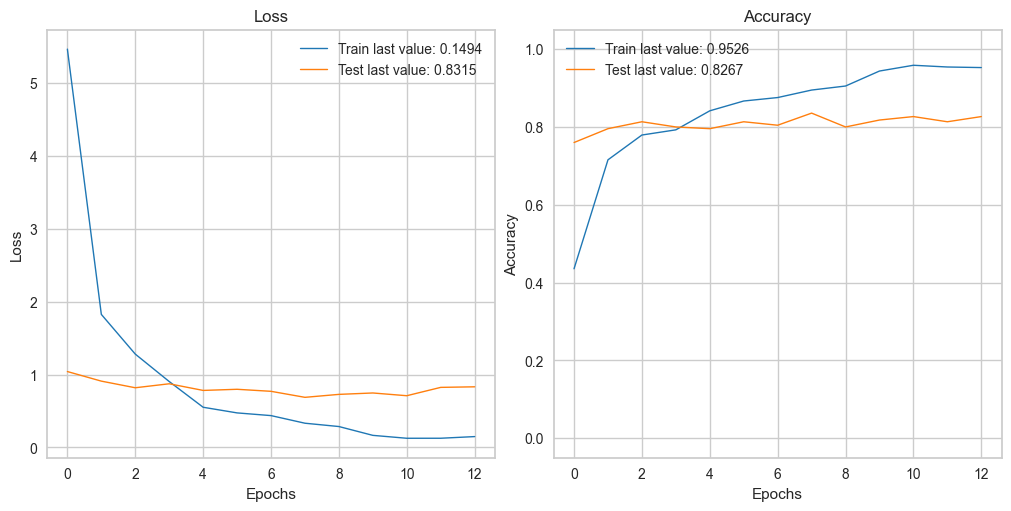

In [19]:
from plot_keras_history import show_history, plot_history

show_history(history1)
plot_history(history1, path="standard.png")
plt.close()

- Sur le graphique **Loss**, la courbe train diminue rapidement pendant les premières époques, ce qui indique que le modèle apprend rapidement à ajuster ses poids pour minimiser la perte sur les données d'entraînement. Après cela, la courbe semble se stabiliser, ce qui suggère que son apprentissage ralentit. 
D'autre part, la courbe test reste relativement constan92, ce qui signifie que la pertt ne diminue pas significativement au fil des époques. Cela peut indiquer que le modèil atteint une limite de performance sur cet ensemble de données spécifiqu
  
- Sur le graphique **Accuracy**,  la courbe train augmente progressivement alors que la courbe test semble augmenter mais cela reste léger. Les valeurs indiquent une différence de performance entre les données train et test. La précision sur l'ensemble d'entraînement est plus élevée que sur l'ensemble de test. Cela peut suggérer un léger surapprentissage, où le modèle s'adapte trop étroitement aux données d'entraînement spécifiques et ne généralise pas aussi bien sur de nouvelles données. ion.

In [20]:
# Récupération des données sur le meilleur epoch
y_val_num = np.argmax(y_val, axis=1)
y_val_pred = np.argmax(model1.predict(X_val), axis=1)
y_val_num = np.argmax(y_val, axis=1)
print(y_val_num)
print()
print(y_val_pred)

8/8 [==============================] - 37s 5s/step
[2 2 3 0 1 5 3 6 3 4 0 1 5 2 3 5 4 1 2 4 3 0 4 2 2 5 3 2 5 1 3 0 0 2 5 5 1
 2 1 2 2 0 3 6 4 6 5 4 6 1 6 0 5 5 5 1 0 2 6 4 0 0 5 6 3 1 0 6 1 1 6 3 0 0
 3 1 4 4 6 0 2 0 6 3 2 6 4 0 4 5 6 2 0 1 0 3 2 3 5 3 5 0 0 5 3 6 5 1 1 0 5
 6 3 0 2 2 5 1 0 1 1 4 6 0 6 1 1 4 4 0 5 4 4 3 4 1 3 6 3 5 1 2 6 4 6 2 4 5
 1 2 6 6 5 0 1 6 2 3 0 1 3 0 5 1 5 3 4 4 2 6 6 4 1 0 1 5 0 3 4 5 5 0 3 4 6
 1 5 5 2 4 1 2 4 5 3 1 2 6 6 5 6 1 4 2 0 2 6 3 4 1 3 6 3 3 2 4 4 4 3 3 6 1
 6 0 2]

[2 2 3 0 1 5 4 6 3 4 0 1 5 3 3 5 0 1 2 0 3 4 0 1 2 5 3 2 5 1 3 0 3 2 5 5 1
 2 1 2 2 4 3 6 0 6 5 4 6 6 6 0 2 5 5 1 2 1 6 4 0 0 5 6 3 1 0 6 1 1 6 3 1 0
 1 1 4 4 6 0 2 0 6 2 2 6 4 0 4 5 6 2 0 3 1 0 5 3 5 3 5 0 0 5 3 6 3 1 1 0 5
 6 3 0 2 2 3 1 0 3 5 4 6 0 6 1 1 2 4 0 5 4 4 3 4 1 3 6 3 1 2 2 6 4 6 2 4 5
 1 2 6 6 5 0 1 6 2 3 4 1 3 0 5 1 5 3 4 4 2 6 6 4 1 0 1 5 0 3 4 5 5 0 6 4 6
 1 5 2 3 0 1 2 0 5 3 1 2 6 2 5 6 1 4 2 0 2 6 3 4 1 3 6 3 5 2 4 4 4 3 3 6 1
 6 3 2]


In [21]:
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred)
print(conf_mat)

[[25  2  1  2  3  0  0]
 [ 0 29  1  2  0  1  1]
 [ 0  2 25  2  0  1  0]
 [ 1  1  1 26  1  1  1]
 [ 6  0  1  0 24  0  0]
 [ 0  1  2  2  0 27  0]
 [ 0  0  1  0  0  0 32]]


La matrice de confusion révèle les performances de notre modèle de classification. Nous pouvons voir que certaines classes sont bien prédites, tandis que d'autres ont plus d'erreurs de prédiction.


In [22]:
def conf_mat_transform(y_true,y_pred) :
    conf_mat = metrics.confusion_matrix(y_true,y_pred)
    
    corresp = np.argmax(conf_mat, axis=0)
    print ("Correspondance des clusters : ", corresp)
    # y_pred_transform = np.apply_along_axis(correspond_fct, 1, y_pred)
    labels = pd.Series(y_true, name="y_true").to_frame()
    labels['y_pred'] = y_pred
    labels['y_pred_transform'] = labels['y_pred'].apply(lambda x : corresp[x]) 
    
    return labels['y_pred_transform']

In [23]:
y_val_pred_transform = conf_mat_transform(y_val_num, y_val_pred)
conf_mat = metrics.confusion_matrix(y_val_num, y_val_pred_transform)
print(conf_mat)
print()
print(metrics.classification_report(y_val_num, y_val_pred_transform))

Correspondance des clusters :  [0 1 2 3 4 5 6]
[[25  2  1  2  3  0  0]
 [ 0 29  1  2  0  1  1]
 [ 0  2 25  2  0  1  0]
 [ 1  1  1 26  1  1  1]
 [ 6  0  1  0 24  0  0]
 [ 0  1  2  2  0 27  0]
 [ 0  0  1  0  0  0 32]]

              precision    recall  f1-score   support

           0       0.78      0.76      0.77        33
           1       0.83      0.85      0.84        34
           2       0.78      0.83      0.81        30
           3       0.76      0.81      0.79        32
           4       0.86      0.77      0.81        31
           5       0.90      0.84      0.87        32
           6       0.94      0.97      0.96        33

    accuracy                           0.84       225
   macro avg       0.84      0.83      0.83       225
weighted avg       0.84      0.84      0.84       225



Les mesures de précision, recall et f1-score donnent une évaluation plus détaillée de la performance du modèle pour chaque classe. Par exemple, la classe 5 a une précision de 0.90, ce qui signifie que 90% des exemples prédits comme appartenant à la classe 5 le sont réellement. Le recall de 0.87 signifie que le modèle a réussi à capturer 87% de tous les exemples de la classe 5.

L'accuracy globale du modèle est de 0.84, ce qui indique que le modèle a correctement classé environ 84% des exemples de l'ensemble de test. Les valeurs macro avg et weighted avg fournissent des moyennes pondérées des mesures de performance, prenant en compte les déséquilibres de classes.

In [24]:
data['label_name'] = data['main_category'].astype('category')
list_labels = list(data['label_name'].cat.categories)
list_labels

['baby care',
 'beauty and personal care',
 'computers',
 'home decor and festive needs',
 'home furnishing',
 'kitchen and dining',
 'watches']

<Axes: >

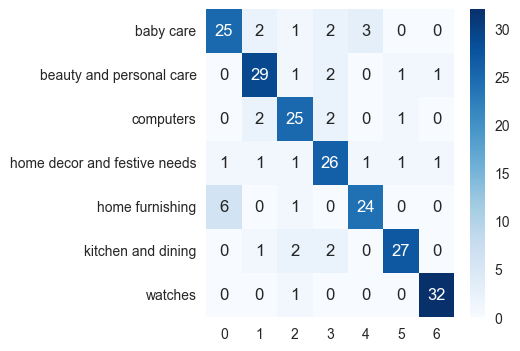

In [25]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (4, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='g')

## IV- Approche ImageDatagenerator avec data augmentation

ImageDataGenerator est une classe de la bibliothèque tensorflow.keras.preprocessing.image qui permet de créer des générateurs d'images en temps réel pour l'entraînement de modèles de réseaux de neurones convolutionnels en utilisant des données d'images stockées sur le disque.

Lorsqu'on utilise ImageDataGenerator, on définit des transformations d'images, appelées augmentations de données, qui seront appliquées aux images d'entraînement en temps réel pendant l'entraînement du modèle. Ces augmentations de données peuvent inclure des rotations aléatoires, des translations, des changements d'échelle, des retournements horizontaux et verticaux, et d'autres techniques pour améliorer la diversité des données d'entraînement.

En utilisant ImageDataGenerator, on peut charger les images à la volée, en les prétraitant et en les augmentant en temps réel, ce qui permet de travailler avec des ensembles de données volumineux qui ne peuvent pas être chargés en mémoire en une seule fois. Cela permet également d'éviter le surapprentissage en augmentant la diversité des données d'entraînemmages.

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
#batch_size = 32
batch_size = 64

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='path_image', y_col='main_category',
                                weight_col=None, target_size=(256, 256),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

Le batch size, hyperparamètre en ML, détermine le nombre d'échantillons traités par itération d'entraînement. Plus il est élevé, plus l'entraînement est rapide mais demande plus de mémoire. Un batch size plus petit prend plus de temps mais peut donner un modèle plus précis. C'est un compromis entre vitesse et précision, dépendant de la taille des données et du matériel disponible.acteurs.

In [28]:
datagen_train = ImageDataGenerator(
#    featurewise_center=True,
#    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

datagen_test = ImageDataGenerator(validation_split=0,
                                  preprocessing_function=preprocess_input)

# train
train_flow = data_flow_fct(data, datagen_train, data_type='training')
# validation
val_flow = data_flow_fct(data, datagen_train, data_type='validation')
# test
test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

# compute quantities required for featurewise normalization
# (std, mean, and principal components if ZCA whitening is applied)
# datagen.fit(X_train)
# fits the model on batches with real-time data augmentation:

Found 675 validated image filenames belonging to 7 classes.
Found 225 validated image filenames belonging to 7 classes.
Found 150 validated image filenames belonging to 7 classes.


Le code initialise trois objets ImageDataGenerator - datagen_train, datagen_test et datagen_val - pour l'augmentation et le prétraitement des données.

datagen_train est utilisé pour générer des lots de données d'entraînement avec diverses transformations telles que la rotation, le retournement horizontal et le décalage. Il effectue également un prétraitement des données à l'aide d'une fonction appelée preprocess_input.

datagen_test est utilisé pour générer des lots de données de test. Contrairement à datagen_train, il n'effectue pas d'augmentation de données, mais applique la même fonction de prétraitement que datagen_train.

datagen_val n'est pas explicitement défini dans le bloc de code, mais il est utilisé indirectement via la fonction data_flow_fct pour générer des lots de données de validation avec les mêmes paramètres que datagen_train.

Après l'initialisation des objets ImageDataGenerator, la fonction data_flow_fct est appelée trois fois avec différents paramètres pour créer trois objets ImageDataGenerator Keras - train_flow, val_flow et test_flow - qui sont utilisés pour fournir les données d'entraînement, de validation et de test au modèle pendant l'entraînement.

train_flow et val_flow sont générés à l'aide de datagen_train et sont utilisés pour générer des lots de données d'entraînement et de validation, respectivement. test_flow est généré à l'aide de datagen_test et est utilisé pour générer des lots de données de test.

Le paramètre validation_split est utilisé pour spécifier la proportion de données qui doivent être réservées à la validation pendant l'entraînement. Dans ce cas, 25% des données sont utilisées pour la validation.

In [29]:
# Création du modèle
with tf.device('/cpu:0'): 
    model2 = create_model_fct()

# Création du callback
model2_save_path = "./model2_best_weights.h5"
checkpoint = ModelCheckpoint(model2_save_path,
                             monitor='val_loss',
                             verbose=1,
                             save_best_only=True,
                             mode='min')
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   verbose=1,
                   patience=5)
callbacks_list = [checkpoint, es]

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

Dans ce code, un modèle est créé avec create_model_fct() et stocké dans la variable model2. Ensuite, un ModelCheckpoint et un EarlyStopping sont créés et stockés dans la liste callbacks_list. ModelCheckpoint permet de sauvegarder les poids du modèle avec la plus petite perte de validation (val_loss), tandis que EarlyStopping permet d'arrêter l'entraînement du modèle si la perte de validation (val_loss) n'a pas diminué après un certain nombre de patience epochs..m

In [30]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [31]:
with tf.device('/cpu:0'): 
    history2 = model2.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50,
                    callbacks=callbacks_list, verbose=1)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 5.1372 - accuracy: 0.4030 
Epoch 1: val_loss improved from inf to 1.37407, saving model to .\model2_best_weights.h5
11/11 [==============================] - 219s 20s/step - loss: 5.1372 - accuracy: 0.4030 - val_loss: 1.3741 - val_accuracy: 0.7244
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.8627 - accuracy: 0.6326 
Epoch 2: val_loss improved from 1.37407 to 1.15575, saving model to .\model2_best_weights.h5
11/11 [==============================] - 213s 20s/step - loss: 1.8627 - accuracy: 0.6326 - val_loss: 1.1558 - val_accuracy: 0.7644
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.3445 - accuracy: 0.7111 
Epoch 3: val_loss improved from 1.15575 to 1.14881, saving model to .\model2_best_weights.h5
11/11 [==============================] - 212s 20s/step - loss: 1.3445 - accuracy: 0.7111 - val_loss: 1.1488 - val_accuracy: 0.7689
Epoch 4/50
11/11 [=============================

In [32]:
# Score du dernier epoch
loss, accuracy = model2.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model2.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

11/11 [==============================] - 17781s 1776s/step - loss: 0.0390 - accuracy: 0.9881
Training Accuracy   : 0.9881

4/4 [==============================] - 47s 10s/step - loss: 1.0321 - accuracy: 0.8356
Validation Accuracy :  0.8356


In [33]:
# Score de l'epoch optimal
model2.load_weights(model2_save_path)

loss, accuracy = model2.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model2.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))

Validation Accuracy :  0.8222
Test Accuracy       :  0.7800


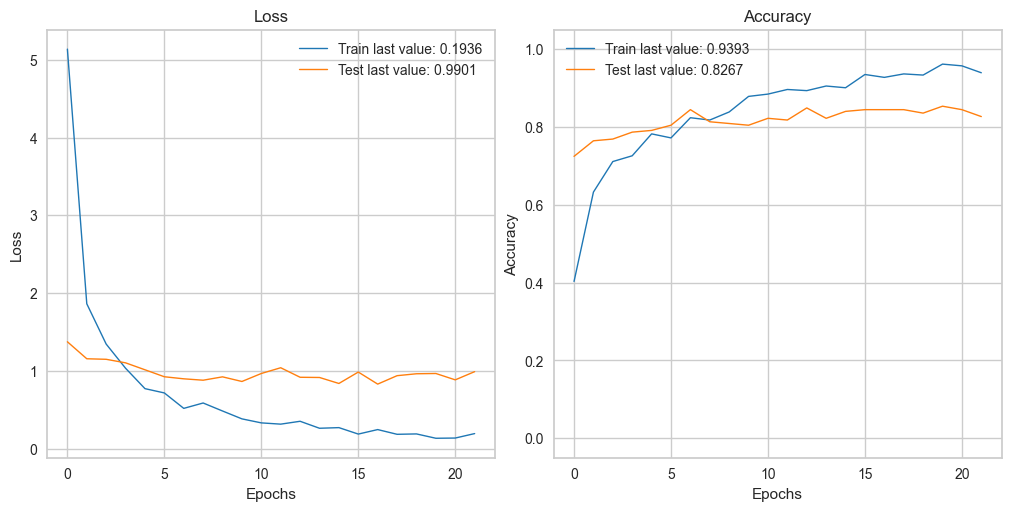

In [34]:
show_history(history2)
plot_history(history2, path="standard.png")
plt.close()

Globalement, les nouveaux résultats avec la data augmentation montre une amélioration à peine perceptible dans la capacité du modèle à minimiser la perte d'entraînement. 

## V- Approche nouvelle par Dataset avec data augmentation intégrée au modèle

Cette méthode combine les avantages de l'approche dataset traditionnelle avec ceux de l'augmentation de données en temps réel. Les données sont prétraitées comme dans l'approche dataset traditionnelle, mais au lieu de diviser les données en ensembles de formation, de validation et de test, les données d'entraînement sont augmentées en temps réel à l'aide de techniques telles que la rotation, le zoom, le décalage et la symétrie horizontale. Ces transformations sont appliquées de manière aléatoire à chaque image pendant l'entraînement, augmentant ainsi la quantité de données d'entraînement disponible et créant des variations des images originales.

Cette approche peut produire des performances similaires à celles de l'approche dataset traditionnelle avec l'augmentation de données appliquée séparément, mais nécessite moins de temps et d'efforts pour préparer les donnée.
s.les.

In [35]:
#batch_size = 32
batch_size = 64

def data_flow_fct(data, datagen, data_type=None) :
    data_flow = datagen.flow_from_dataframe(data, directory='',
                                x_col='path_image', y_col='main_category',
                                weight_col=None, target_size=(224, 224),
                                classes=None, class_mode='categorical',
                                batch_size=batch_size, shuffle=True, seed=42,
                                subset=data_type
                                )
    return data_flow

In [36]:
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.25,
    preprocessing_function=preprocess_input)

datagen_test = ImageDataGenerator(validation_split=0,
                                  preprocessing_function=preprocess_input)

# train
train_flow = data_flow_fct(data, datagen_train, data_type='training')
# validation
val_flow = data_flow_fct(data, datagen_train, data_type='validation')
# test
test_flow = data_flow_fct(data_test, datagen_test, data_type=None)

Found 675 validated image filenames belonging to 7 classes.
Found 225 validated image filenames belonging to 7 classes.
Found 150 validated image filenames belonging to 7 classes.


In [37]:
def create_model_fct2() :
    # Data augmentation
    data_augmentation = Sequential([
        RandomFlip("horizontal", input_shape=(224, 224, 3)),
        RandomRotation(0.1),
        RandomZoom(0.1),
        # Rescaling(1./127.5, offset=-1.0)
      ])
    
    # Récupération modèle pré-entraîné
    model_base = VGG16(include_top=False, weights="imagenet", input_shape=(224, 224, 3))
    for layer in model_base.layers:
        layer.trainable = False

    # Définition du nouveau modèle
    model = Sequential([
                data_augmentation,
                Rescaling(1./127.5, offset=-1),
                model_base,
                GlobalAveragePooling2D(),
                Dense(256, activation='relu'),
                Dropout(0.5),
                Dense(7, activation='softmax')
                ])

    # compilation du modèle 
    model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

    print(model.summary())
    
    return model

La fonction `create_model_fct2` crée un modèle de réseau de neurones convolutifs pour la classification d'images en utilisant VGG16 comme base. Voici ce que fait la fonction :

- **Augmentation de données** : Elle modifie les images d'entrée avec des retournements, des rotations et des zooms aléatoires pour diversifier les données d'entraînement.
  
- **Modèle de base** : Elle charge le modèle VGG16 avec des poids pré-entraînés depuis "imagenet".
  
- **Nouveau modèle** : Elle assemble un nouveau modèle avec une couche de normalisation, VGG16, une couche de mise en commun, deux couches de neurones connectés, et une couche de sortie pour la classification.

- **Compilation du modèle** : Elle compile le modèle avec une fonction de perte, un optimiseur et des métriques pour l'entraînement.

Enfin, la fonction retourne le modèle prêt à être entraîné.


In [38]:
# Création du modèle
with tf.device('/gpu:0'): 
    model4 = create_model_fct2()

# Création du callback
model4_save_path = "./model4_best_weights.h5"
checkpoint = ModelCheckpoint(model4_save_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
callbacks_list = [checkpoint, es]

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d_2   (None, 512)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_4 (Dense)             (None, 256)               131328    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                      

In [39]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [40]:
with tf.device('/gpu:0'): 
    history4 = model4.fit(train_flow,
                    validation_data=val_flow,
                    batch_size=batch_size, epochs=50, callbacks=callbacks_list, verbose=1)

Epoch 1/50
11/11 [==============================] - ETA: 0s - loss: 1.9648 - accuracy: 0.2089 
Epoch 1: val_loss improved from inf to 1.58341, saving model to .\model4_best_weights.h5
11/11 [==============================] - 167s 15s/step - loss: 1.9648 - accuracy: 0.2089 - val_loss: 1.5834 - val_accuracy: 0.5333
Epoch 2/50
11/11 [==============================] - ETA: 0s - loss: 1.6001 - accuracy: 0.4193 
Epoch 2: val_loss improved from 1.58341 to 1.28153, saving model to .\model4_best_weights.h5
11/11 [==============================] - 167s 15s/step - loss: 1.6001 - accuracy: 0.4193 - val_loss: 1.2815 - val_accuracy: 0.6978
Epoch 3/50
11/11 [==============================] - ETA: 0s - loss: 1.3698 - accuracy: 0.5348 
Epoch 3: val_loss improved from 1.28153 to 1.10261, saving model to .\model4_best_weights.h5
11/11 [==============================] - 169s 16s/step - loss: 1.3698 - accuracy: 0.5348 - val_loss: 1.1026 - val_accuracy: 0.7244
Epoch 4/50
11/11 [=============================

In [41]:
# Score du dernier epoch

loss, accuracy = model4.evaluate(train_flow, verbose=True)
print("Training Accuracy   : {:.4f}".format(accuracy))
print()
loss, accuracy = model4.evaluate(val_flow, verbose=True)
print("Validation Accuracy :  {:.4f}".format(accuracy))

11/11 [==============================] - 124s 11s/step - loss: 0.4559 - accuracy: 0.8593
Training Accuracy   : 0.8593

4/4 [==============================] - 41s 10s/step - loss: 0.6033 - accuracy: 0.8267
Validation Accuracy :  0.8267


In [42]:
# Score de l'epoch optimal

model4.load_weights(model4_save_path)

loss, accuracy = model4.evaluate(val_flow, verbose=False)
print("Validation Accuracy :  {:.4f}".format(accuracy))

loss, accuracy = model4.evaluate(test_flow, verbose=False)
print("Test Accuracy       :  {:.4f}".format(accuracy))


Validation Accuracy :  0.8222
Test Accuracy       :  0.7333


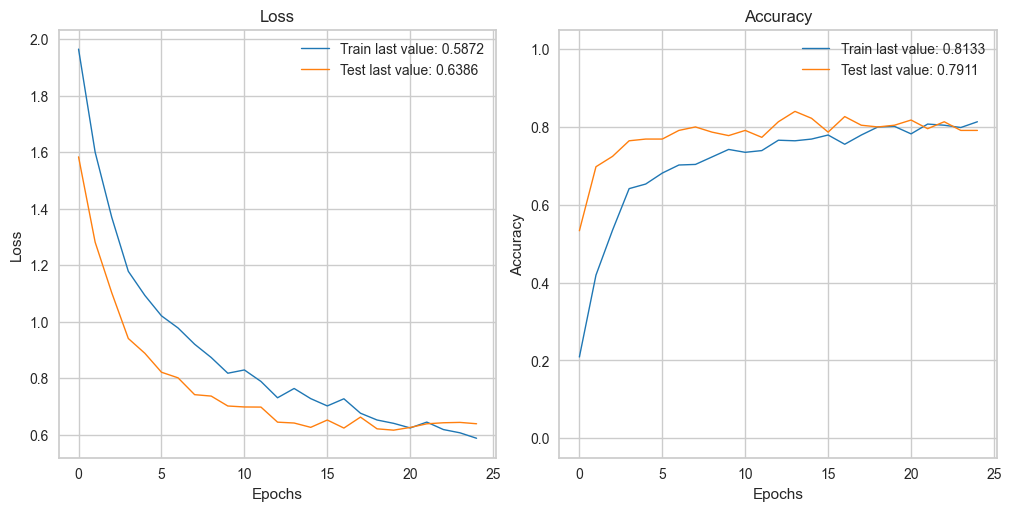

In [43]:
show_history(history4)
plot_history(history4, path="standard.png")
plt.close()

## Conclusion

- Le modèle retenu est donc VGG16 avec data augmentation, l’optimizer rmsprop et des batch de 64.
- Les résultats sont corrects au regard du nombre d’images
- La data augmentation permet surtout d’éviter le sur-apprentissage